In [1]:
#Importacion de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re 

#NLTK
#https://www.nltk.org
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#Wordcloud
from wordcloud import WordCloud 

#Configuracion general de matplotlib
%matplotlib inline
plt.style.use('default')

#Tamaños de textos
figure_sub_title_fs = 15
figure_labels_fs = 12
figure_axis_fs = 10
figure_legend_fs = 10

#Tamaño de la visualización, hoja A4
fig = plt.figure()
fig.set_size_inches(20,30)

#Formato de numeros reales
pd.options.display.float_format = '{:20,.2f}'.format

#Configuracion de warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/juan0511/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juan0511/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juan0511/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 2000x3000 with 0 Axes>

In [2]:
#Importacion del archivo CSV de fuente
#https://www.kaggle.com/c/nlp-getting-started
tweets = pd.read_csv('../data/train.csv')

#Vemos la estructura del dataframe, trayendo los primeros 5 registros
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#Vemos la cantidad de registros
print("Shape: " + str(tweets.shape))

Shape: (7613, 5)


In [4]:
#Constatamos que en text y target no existen nulos
tweets.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
#Relleno de nulos
tweets['keyword'] = tweets['keyword'].fillna('None')
tweets['location'] = tweets['location'].fillna('Unknown')

In [6]:
#Calculamos la longitud de los tweets en el set de datos, y la guardamos en una nueva columna
tweets['length'] = tweets['text'].str.len()

In [7]:
#Nos quedamos con los tweets que tienen target 0 y target 1 en 2 series, respectivamente
tweets_lengths_0 = tweets[tweets['target'] == 0]
tweets_lengths_0_s = tweets_lengths_0['length']
tweets_lengths_1 = tweets[tweets['target'] == 1]
tweets_lengths_1_s = tweets_lengths_1['length']

## PREGUNTAS

0 - Matriz de correlación entre todas las variables?
- Ver qué pregunta podría contestar esto

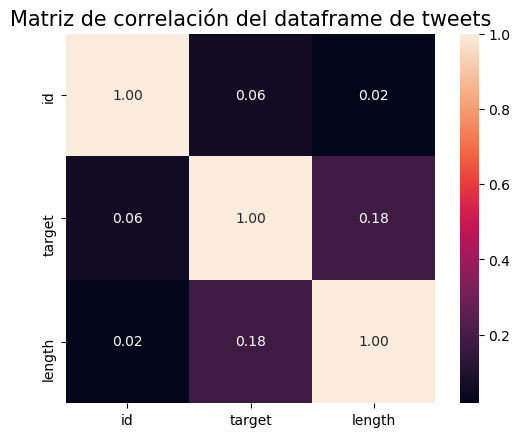

In [8]:
# Matriz de correlaciones como heatmap, variables numericas
plt.figure()
ax1 = sns.heatmap(tweets.corr(method='pearson', min_periods=1), square=True, annot=True, fmt='.2f')
ax1.set_title("Matriz de correlación del dataframe de tweets", fontsize=figure_sub_title_fs);

plt.show()

1 - Cuál es la distribución de tweets según su target?

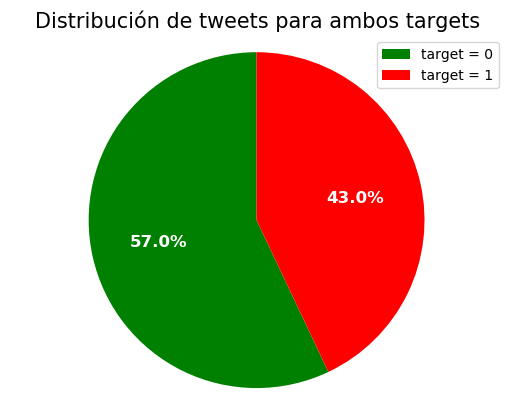

In [9]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
fig = plt.figure()
ax1 = fig.add_subplot()
labels = "target = 0", "target = 1"
colors = ["green", "red"]
sizes = [tweets_lengths_0_s.count(), tweets_lengths_1_s.count()]
ax1.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w",fontweight='bold', fontsize=figure_labels_fs))
ax1.axis('equal')
ax1.legend(labels,fontsize=figure_legend_fs)
ax1.set_title("Distribución de tweets para ambos targets", fontsize=figure_sub_title_fs)

plt.show()

2 - Cuál es la distribución de tweets según su idioma?

In [10]:
#Andy

3 - Cuál es la distribución geográfica de los tweets?
- Qué proporción de tweets incluye location?
- Según el target?
- Cual es la distribución de targets por location?

In [11]:
#JM
#Vemos cuantas locations hay
tweets['location'].value_counts()

Unknown                       2535
USA                            104
New York                        71
United States                   50
London                          45
                              ... 
Pakistan, Islamabad              1
Bournemouth, Dorset, UK          1
Black Canyon New River, AZ       1
Ivano-Frankivsk                  1
Miami ??                         1
Name: location, Length: 3341, dtype: int64

In [12]:
print("Total de tweets                : " + str(tweets['target'].count()) + "\n")

print("Cantidad de tweets con location: " + str((tweets['location'] == 'Unknown').value_counts().iloc[0]))
print("Cantidad de tweets sin location: " + str((tweets['location'] == 'Unknown').value_counts().iloc[1]))
print("Cantidad de locations unicas   : " + str(tweets['location'].value_counts().size))

Total de tweets                : 7613

Cantidad de tweets con location: 5078
Cantidad de tweets sin location: 2535
Cantidad de locations unicas   : 3341


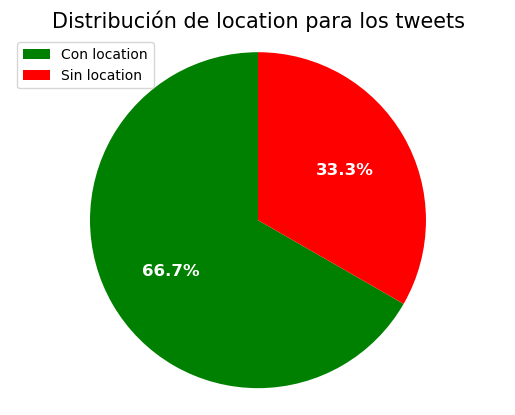

In [13]:
#Distribucion de tweets con location y sin location
fig = plt.figure()
ax1 = fig.add_subplot()
labels = "Con location", "Sin location"
sizes = [(tweets['location'] == 'Unknown').value_counts().iloc[0], (tweets['location'] == 'Unknown').value_counts().iloc[1]]
ax1.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w",fontweight='bold', fontsize=figure_labels_fs))
ax1.axis('equal')
ax1.legend(labels,fontsize=figure_legend_fs)
ax1.set_title("Distribución de location para los tweets", fontsize=figure_sub_title_fs)

plt.show()

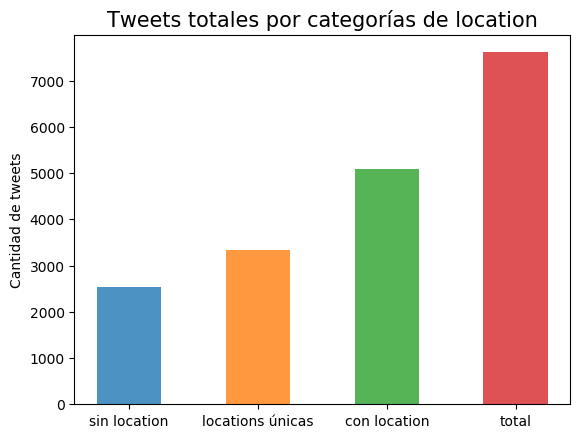

In [14]:
#Proporción de tweets que tienen location unica
#Graficamos las estadisticas basicas de la longitud de los tweets
#fig = plt.figure()
#ax4 = fig.add_subplot()
#barWidth = 0.25
#bars1 = tweets['target'].count()
#bars2 = (tweets['location'] == 'Unknown').value_counts().iloc[0]
#bars3 = (tweets['location'] == 'Unknown').value_counts().iloc[1]
#bars4 = 

#ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#plt.show()

#Graficamos las estadisticas basicas de la longitud de los tweets
fig = plt.figure()
ax4 = fig.add_subplot()
barWidth = 0.25
bars1 = [(tweets['location'] == 'Unknown').value_counts().iloc[1]]
bars2 = [tweets['location'].value_counts().size]
bars3 = [(tweets['location'] == 'Unknown').value_counts().iloc[0]]
bars4 = [tweets['target'].count()]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.xticks([0,0.5,1,1.5], ['sin location', 'locations únicas', 'con location', 'total'], fontsize=figure_axis_fs)
ax4.bar(0, bars1, width=barWidth, label='target = 0', alpha=0.8)
ax4.bar(0.5, bars2, width=barWidth, label='target = 1', alpha=0.8)
ax4.bar(1, bars3, width=barWidth, label='target = 1', alpha=0.8)
ax4.bar(1.5, bars4, width=barWidth, label='target = 1', alpha=0.8)

ax4.set_title("Tweets totales por categorías de location", fontsize=figure_sub_title_fs)
ax4.set_ylabel("Cantidad de tweets", fontsize=figure_axis_fs)

plt.show()


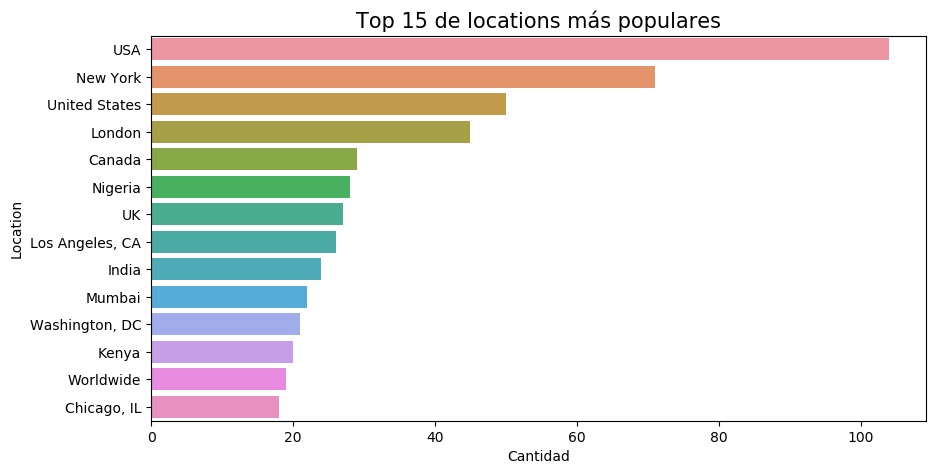

In [15]:
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations_df = tweets[tweets['location'] != 'Unknown']
tweets_top_locations = tweets['location'].value_counts().head(15)
tweets_top_locations = tweets_top_locations.drop(tweets_top_locations.index[0])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()

ax1 = sns.barplot(x=tweets_top_locations.values, y=tweets_top_locations.index)
ax1.set_xlabel("Cantidad",fontsize=figure_axis_fs)
ax1.set_ylabel("Location",fontsize=figure_axis_fs)
ax1.set_title("Top 15 de locations más populares", fontsize=figure_sub_title_fs)
plt.show()

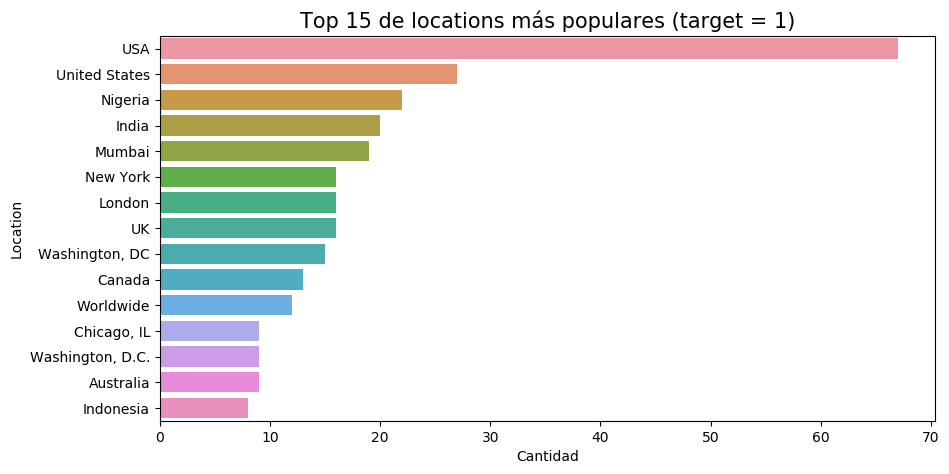

In [16]:
#Mismo que anterior pero discriminado por target 1
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations_1_df = tweets_top_locations_df[tweets_top_locations_df['target'] == 1]
tweets_top_locations_1 = tweets_top_locations_1_df['location'].value_counts().head(15)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()

ax1 = sns.barplot(x=tweets_top_locations_1.values, y=tweets_top_locations_1.index)
ax1.set_xlabel("Cantidad",fontsize=figure_axis_fs)
ax1.set_ylabel("Location",fontsize=figure_axis_fs)
ax1.set_title("Top 15 de locations más populares (target = 1)", fontsize=figure_sub_title_fs)
plt.show()

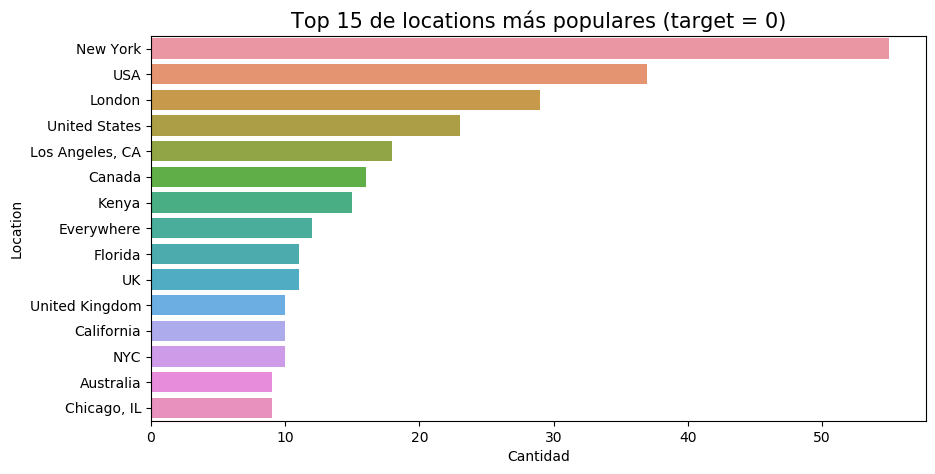

In [37]:
#Mismo que anterior pero discriminado por target 0
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations_0_df = tweets_top_locations_df[tweets_top_locations_df['target'] == 0]
tweets_top_locations_0 = tweets_top_locations_0_df['location'].value_counts().head(15)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()

ax1 = sns.barplot(x=tweets_top_locations_0.values, y=tweets_top_locations_0.index)
ax1.set_xlabel("Cantidad",fontsize=figure_axis_fs)
ax1.set_ylabel("Location",fontsize=figure_axis_fs)
ax1.set_title("Top 15 de locations más populares (target = 0)", fontsize=figure_sub_title_fs)
plt.show()

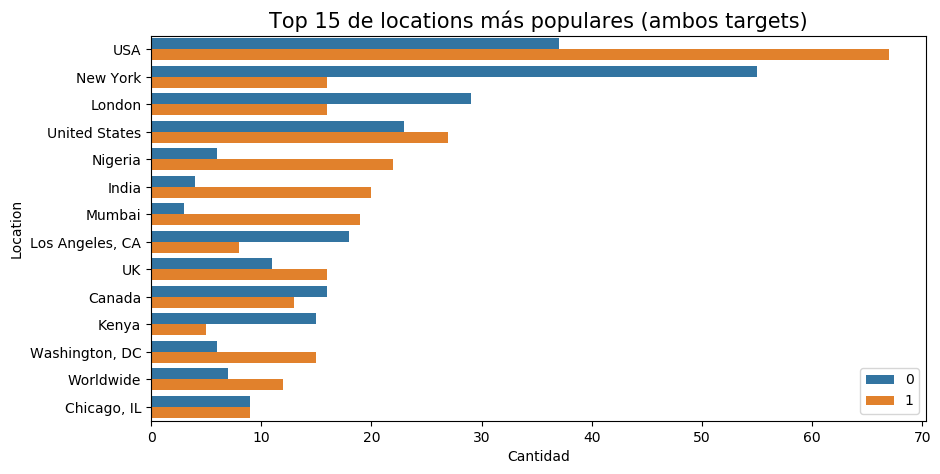

In [18]:
#Combinamos los mas populares con ambos targets, separados por target
tweets_top_locations_count_grouped = tweets_top_locations_df.groupby(['location','target']).size().reset_index()
tweets_top_locations_count_grouped = tweets_top_locations_count_grouped.rename(columns={0:'count'})

tweets_top_locations_count_grouped['populares'] = tweets_top_locations_count_grouped['location'].isin(tweets_top_locations.index)
tweets_top_locations_count_grouped_filtered = tweets_top_locations_count_grouped[tweets_top_locations_count_grouped['populares']==True]
tweets_top_locations_count_grouped_filtered_sorted = tweets_top_locations_count_grouped_filtered.sort_values(('count'),ascending=False)
tweets_top_locations_count_grouped_filtered_sorted

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()
ax1 = sns.barplot(x='count', y='location', hue='target', data=tweets_top_locations_count_grouped_filtered_sorted)
ax1.set_xlabel("Cantidad",fontsize=figure_axis_fs)
ax1.set_ylabel("Location",fontsize=figure_axis_fs)
ax1.legend(fontsize=figure_legend_fs)
ax1.set_title("Top 15 de locations más populares (ambos targets)", fontsize=figure_sub_title_fs)
plt.show()

4 - Existe relación entre el valor del target y la longitud de los tweets?

In [19]:
#Imprimimos el total de tweets y valores maximos, minimos, medios de longitud para cada serie
print("Total de tweets          : " + str(tweets['target'].count()) + "\n")
print("Cantidad,        target 0: " + str(tweets_lengths_0_s.count()))
print("Longitud minima, target 0: " + str(tweets_lengths_0_s.min()))
print("Longitud media,  target 0: " + str(tweets_lengths_0_s.mean()))
print("Longitud maxima, target 0: " + str(tweets_lengths_0_s.max()) + "\n")
print("Cantidad,        target 1: " + str(tweets_lengths_1_s.count()))
print("Longitud minima, target 1: " + str(tweets_lengths_1_s.min()))
print("Longitud media,  target 1: " + str(tweets_lengths_1_s.mean()))
print("Longitud maxima, target 1: " + str(tweets_lengths_1_s.max()))

Total de tweets          : 7613

Cantidad,        target 0: 4342
Longitud minima, target 0: 7
Longitud media,  target 0: 95.70681713496084
Longitud maxima, target 0: 157

Cantidad,        target 1: 3271
Longitud minima, target 1: 14
Longitud media,  target 1: 108.11342097217977
Longitud maxima, target 1: 151


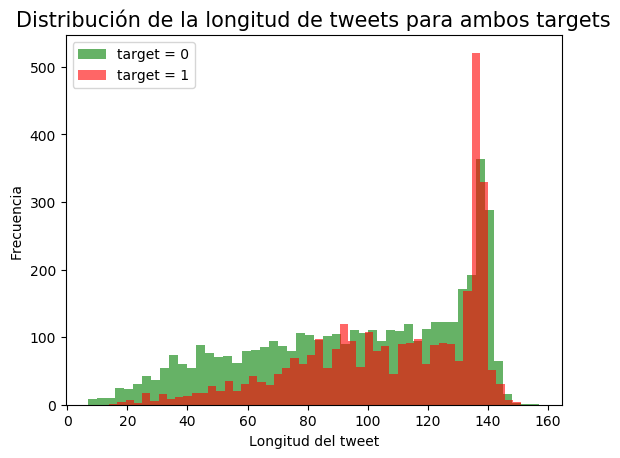

In [20]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
#Histogramas superpuestos
fig = plt.figure()
ax2 = fig.add_subplot()
ax2 = tweets_lengths_0_s.plot.hist(bins=50, color='green',alpha=0.6)
ax2 = tweets_lengths_1_s.plot.hist(bins=50, color='red',alpha=0.6)
ax2.set_title("Distribución de la longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax2.legend(["target = 0","target = 1"],fontsize=figure_legend_fs)
ax2.set_xlabel("Longitud del tweet",fontsize=figure_axis_fs)
ax2.set_ylabel("Frecuencia", fontsize=figure_axis_fs)

plt.show()

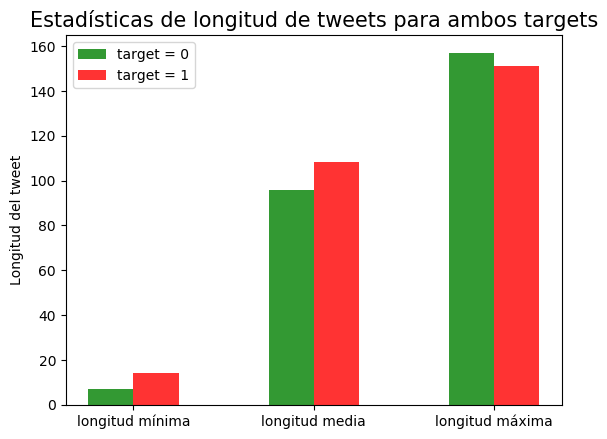

In [21]:
#Graficamos las estadisticas basicas de la longitud de los tweets
fig = plt.figure()
ax4 = fig.add_subplot()
barWidth = 0.25
bars1 = [tweets_lengths_0_s.min(), tweets_lengths_0_s.mean(), tweets_lengths_0_s.max()]
bars2 = [tweets_lengths_1_s.min(), tweets_lengths_1_s.mean(), tweets_lengths_1_s.max()]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['longitud mínima', 'longitud media', 'longitud máxima'], fontsize=figure_axis_fs)
ax4.bar(r1, bars1, color='green', width=barWidth, label='target = 0', alpha=0.8)
ax4.bar(r2, bars2, color='red', width=barWidth, label='target = 1', alpha=0.8)
ax4.set_title("Estadísticas de longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax4.legend(["target = 0","target = 1"],fontsize=figure_legend_fs)
ax4.set_ylabel("Longitud del tweet", fontsize=figure_axis_fs)

plt.show()

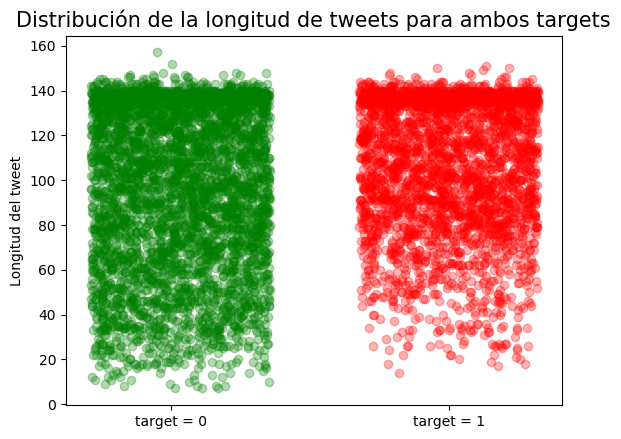

In [22]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
#Scatterplot con jitter
fig = plt.figure()
ax3 = fig.add_subplot()
plt.xticks([0.18,0.80],['target = 0','target = 1'], fontsize=figure_axis_fs)
ax3.scatter(tweets_lengths_0['target'].apply(lambda n: n+(((np.random.random_sample()/2.5)))), tweets_lengths_0['length'], color='green', alpha=0.3)
ax3.scatter(tweets_lengths_1['target'].apply(lambda n: n-(((np.random.random_sample()/2.5)))), tweets_lengths_1['length'], color='red', alpha=0.3)
ax3.set_title("Distribución de la longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax3.set_ylabel("Longitud del tweet", fontsize=figure_axis_fs)

plt.show()

5 - Existe relación entre el valor del target y la cantidad de palabras de los tweets?
- Radar chart sobre las principales keywords y las cantidades de palabras
promedio.en los tweets (uno Para los 10 keyword principales y otro para las 10
menos importantes para comparar)



In [23]:
#Andy

6 - Cuáles son los hashtags más populares?
- Qué proporción de tweets incluye hashtags
- Según el target? Los hashtags de target = 1 indican desastre natural?

In [24]:
#Andy

7 - Cuáles son los los keywords más populares?
- Qué proporción de tweets incluye keywords
- Según el target? Los keywords de target = 1 indican desastre natural?

In [25]:
#Pato

8 - Cuáles son las palabras más populares?
- Según el target? Las palabras de target = 1 indican desastre natural?

<FreqDist with 16919 samples and 97123 outcomes>
[('the', 2599), ('a', 1880)]


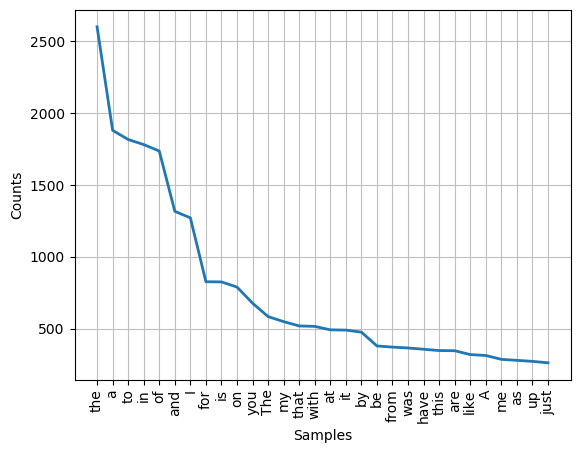

In [26]:
#JM - cantidad de keywords por target
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk/
#https://www.teachstarter.com/vocabulary-list/natural-disaster-vocabulary/

#Limpia puntuacion, quita también usuarios y hashtags (@ y #)
def clean_tweet(words):
    result = []
    for word in words:
        stripped_word = word.strip()
        if ((stripped_word.isalnum() == True) and (not(stripped_word.isdigit()))): # or (stripped_word[0] == '#') or (stripped_word[0] == '@')):       
            result.append(stripped_word)
    
    return result
 
#Separamos las plabras de los tweets, usamos el tokenizador de twitter de nltk
tt = TweetTokenizer()
tweets['text tokenized'] = tweets['text'].apply(tt.tokenize)
tweets['text tokenized'] = tweets['text tokenized'].apply(clean_tweet)

#Armamos una lista con todas las palabras
tweets_words = []
for row in tweets['text tokenized']:
    for word in row:
        tweets_words.append(word)

#Vemos cuales son las dos palabras mas comunes y graficamos la distribucion
fdist = FreqDist(tweets_words)
print(fdist)
print(fdist.most_common(2))
fdist.plot(30,cumulative=False)

<FreqDist with 16568 samples and 61808 outcomes>
[('like', 322), ('via', 213)]


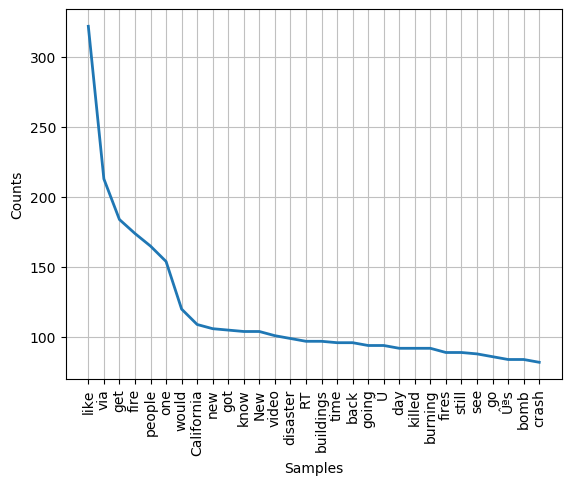

In [27]:
#Sabiendo que todos los tweets son en idioma ingles, quitamos las stopwords, y volvemos a graficar
stop_words=set(stopwords.words("english"))
tweets_words_filtered = []
for word in tweets_words:
    if word.lower() not in stop_words:
        tweets_words_filtered.append(word)

fdist = FreqDist(tweets_words_filtered)
print(fdist)
print(fdist.most_common(2))
fdist.plot(30,cumulative=False)

<FreqDist with 14988 samples and 61808 outcomes>
[('get', 369), ('like', 368)]


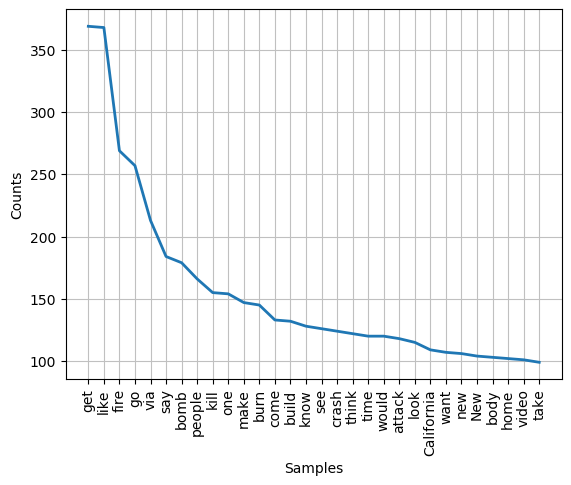

In [28]:
#Obtenemos los lemas y graficamos
lem = WordNetLemmatizer()
tweets_words_filtered_lemmatized=[]
for word in tweets_words_filtered:
    tweets_words_filtered_lemmatized.append(lem.lemmatize(word,"v"))
    
fdist = FreqDist(tweets_words_filtered_lemmatized)
print(fdist)
print(fdist.most_common(2))
fdist.plot(30,cumulative=False)

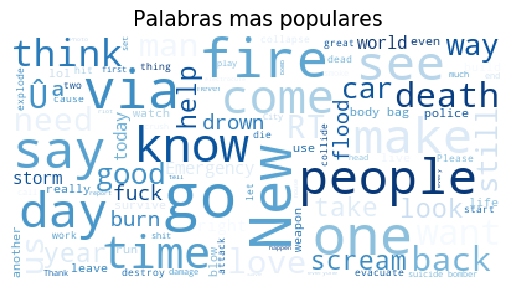

In [29]:
wordcloud = WordCloud(colormap="Blues",max_font_size=50, max_words=100,background_color="white").\
    generate(str(tweets_words_filtered_lemmatized).replace("'", "").replace(" ",""))
plt.title('Palabras mas populares',fontsize=figure_sub_title_fs)
plt.margins(x=0, y=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

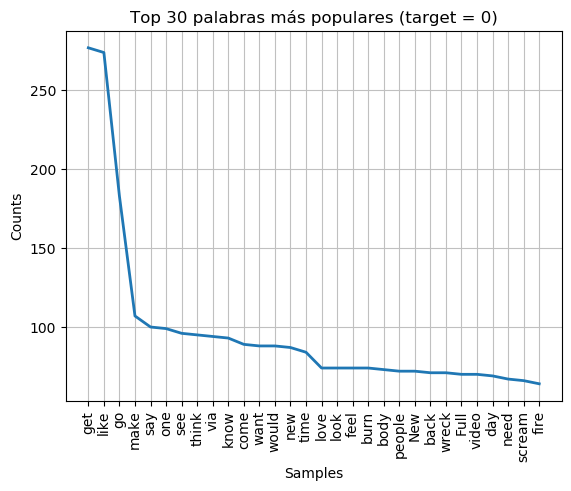

In [30]:
#Limpia puntuacion, quita también usuarios y hashtags (@ y #)
def clean_tweet(words):
    result = []
    for word in words:
        stripped_word = word.strip()
        if ((stripped_word.isalnum() == True) and (not(stripped_word.isdigit()))):      
            result.append(stripped_word)
    
    return result
 
#Separamos las plabras de los tweets, usamos el tokenizador de twitter de nltk
tt = TweetTokenizer()
tweets_target_0 = tweets[tweets['target'] == 0]

tweets_target_0['text tokenized'] = tweets_target_0['text'].apply(tt.tokenize)
tweets_target_0['text tokenized'] = tweets_target_0['text tokenized'].apply(clean_tweet)

#Armamos una lista con todas las palabras
tweets_words = []
for row in tweets_target_0['text tokenized']:
    for word in row:
        tweets_words.append(word)

#Sabiendo que todos los tweets son en idioma ingles, quitamos las stopwords, y volvemos a graficar
stop_words=set(stopwords.words("english"))
tweets_words_filtered = []
for word in tweets_words:
    if word.lower() not in stop_words:
        tweets_words_filtered.append(word)

#Obtenemos los lemas y graficamos
lem = WordNetLemmatizer()
tweets_words_filtered_lemmatized=[]
for word in tweets_words_filtered:
    tweets_words_filtered_lemmatized.append(lem.lemmatize(word,"v"))

fdist = FreqDist(tweets_words_filtered_lemmatized)
fdist.plot(30, cumulative=False, title="Top 30 palabras más populares (target = 0)")

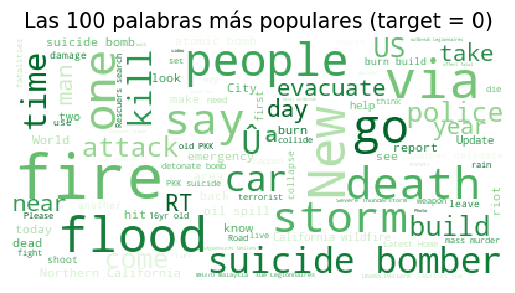

In [35]:
wordcloud = WordCloud(colormap="Greens",max_font_size=50, max_words=100,background_color="white").\
    generate(str(tweets_words_filtered_lemmatized).replace("'", "").replace(" ",""))
plt.title('Las 100 palabras más populares (target = 0)',fontsize=figure_sub_title_fs)
plt.margins(x=0, y=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

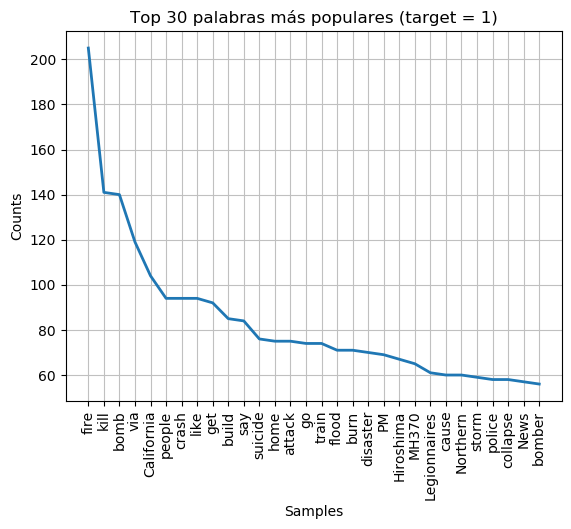

In [32]:
#Limpia puntuacion, quita también usuarios y hashtags (@ y #)
def clean_tweet(words):
    result = []
    for word in words:
        stripped_word = word.strip()
        if ((stripped_word.isalnum() == True) and (not(stripped_word.isdigit()))):
            result.append(stripped_word)
    
    return result
 
#Separamos las plabras de los tweets, usamos el tokenizador de twitter de nltk
tt = TweetTokenizer()
tweets_target_1 = tweets[tweets['target'] == 1]

tweets_target_1['text tokenized'] = tweets_target_1['text'].apply(tt.tokenize)
tweets_target_1['text tokenized'] = tweets_target_1['text tokenized'].apply(clean_tweet)

#Armamos una lista con todas las palabras
tweets_words = []
for row in tweets_target_1['text tokenized']:
    for word in row:
        tweets_words.append(word)

#Sabiendo que todos los tweets son en idioma ingles, quitamos las stopwords, y volvemos a graficar
stop_words=set(stopwords.words("english"))
tweets_words_filtered = []
for word in tweets_words:
    if word.lower() not in stop_words:
        tweets_words_filtered.append(word)

#Obtenemos los lemas y graficamos
lem = WordNetLemmatizer()
tweets_words_filtered_lemmatized=[]
for word in tweets_words_filtered:
    tweets_words_filtered_lemmatized.append(lem.lemmatize(word,"v"))
    
fdist = FreqDist(tweets_words_filtered_lemmatized)
fdist.plot(30,cumulative=False, title="Top 30 palabras más populares (target = 1)")

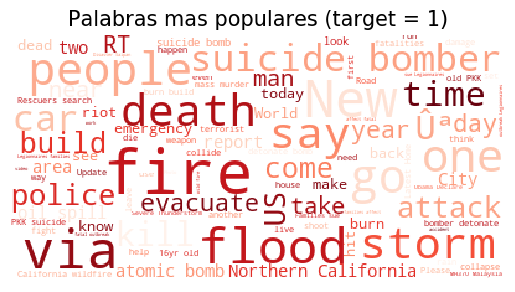

In [39]:
wordcloud = WordCloud(colormap="Reds",max_font_size=50, max_words=100,background_color="white").\
    generate(str(tweets_words_filtered_lemmatized).replace("'", "").replace(" ",""))
plt.title('Palabras mas populares (target = 1)',fontsize=figure_sub_title_fs)
plt.margins(x=0, y=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

9 - Relacionar hashtags con keywords
- Según el target?

In [34]:
#Pato